In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
#for ROC
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/NSU COURSES/NSU SEMESTER 14/CSE445/Project/Heart/hearteda.csv")

In [3]:
#df = pd.read_csv("D:/NSU COURSES/NSU SEMESTER 14/CSE445/Datasets/Heart/heart-3y/heart.csv")

In [4]:
df.shape

(1025, 13)

In [5]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2> ML Models Used:</h2>
   <h4> 1. Logistic Regression </h4>
    <h4>  2. Random Forest Classifier</h4>
   <h4> 3. K-Nearest Neighbour</h4>
   <h4> 4. Decision Tree</h4>
  <h4>  5. Support Vector Machine</h4>
  

<h2> 1. Logistic Regression

In [6]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Confusion Matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,lr_predict))

Confusion Matrix
[[ 77  21]
 [  7 100]]


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [7]:
print("Logistic Regression Accuracy:",lr_acc_score*100,'\n')

Logistic Regression Accuracy: 86.34146341463415 



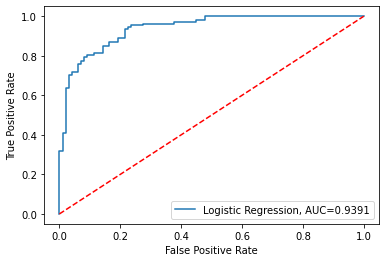

In [8]:
#fit model and plot ROC curve
y_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<h2> 2. Random Forest Classfier

In [9]:
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Confusion matrix")
print(rf_conf_matrix)
print("\n")

print(classification_report(y_test,rf_predicted))

Confusion matrix
[[ 89   9]
 [  2 105]]


              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [10]:
print("Random Forest Accuracy:",rf_acc_score*100,'\n')

Random Forest Accuracy: 94.6341463414634 



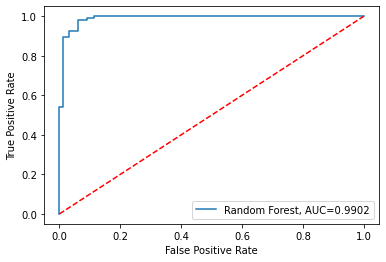

In [11]:
#fit model and plot ROC curve
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<h2> 3. K-Nearest Neighbour

In [12]:
m3 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,knn_predicted))

Confusion matrix
[[85 13]
 [10 97]]


              precision    recall  f1-score   support

           0       0.89      0.87      0.88        98
           1       0.88      0.91      0.89       107

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [13]:
print("K-Nearest Neighbour Accuracy:",knn_acc_score*100,'\n')

K-Nearest Neighbour Accuracy: 88.78048780487805 



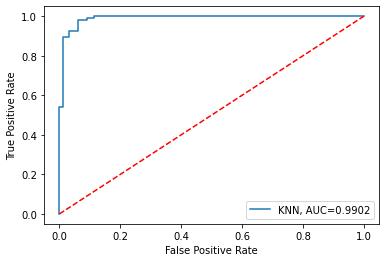

In [14]:
#fit model and plot ROC curve
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<h2> 4. Decision Tree

In [15]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 7)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Confusion matrix")
print(dt_conf_matrix)
print("\n")
print(classification_report(y_test,dt_predicted))

Confusion matrix
[[ 95   3]
 [  3 104]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [16]:
print("Decision Tree Accuracy :",dt_acc_score*100,'\n')

Decision Tree Accuracy : 97.07317073170731 



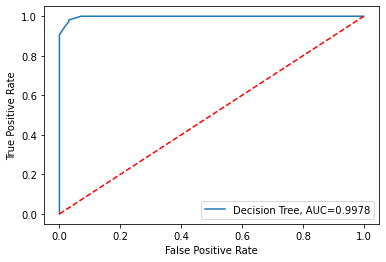

In [17]:
#fit model and plot ROC curve
y_pred = dt.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<h2> 5. Support Vector Machine

In [18]:
m5 = 'Support Vector Machine'
svc =  SVC(kernel='rbf', C=2,probability=True)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Confusion matrix")
print(svc_conf_matrix)
print("\n")
print(classification_report(y_test,svc_predicted))

Confusion matrix
[[ 94   4]
 [  1 106]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.96      0.99      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.97      0.98       205
weighted avg       0.98      0.98      0.98       205



In [19]:
print("Support Vector Machine Accuracy:",svc_acc_score*100,'\n')

Support Vector Machine Accuracy: 97.5609756097561 



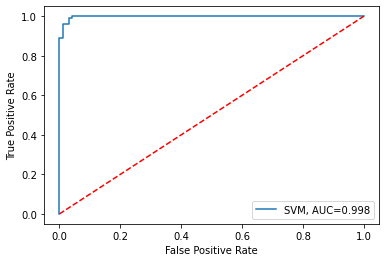

In [20]:
#fit model and plot ROC curve
y_pred = svc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

<h2>  Summary

In [21]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_evaluation

,Model,Accuracy
0,Logistic Regression,86.341463
1,Random Forest,94.634146
2,K-Nearest Neighbour,88.780488
3,Decision Tree,97.073171
4,Support Vector Machine,97.560976


<h2> Conclusion </h2>

<h3> Support Vector Machine gives the most accuracy at 98.53% (approx.)

In [22]:
# import pickle

In [32]:
# filename = "eda-pickle-lr.pkl"
# pickle.dump(lr,open(filename,'wb'))

In [33]:
# model = pickle.load(open(filename, 'rb'))

In [36]:
# user_input=[63,1,0,130,254,0,147,0,1.4,1,1,3]
# user_input=np.array(user_input)
# user_input=user_input.reshape(1,-1)
# prediction = model.predict(user_input)
# prediction

array([0], dtype=int64)